In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORTING THE DATASET
data = pd.read_csv("C:\\Users\\PUNEET SINGH\\fruad_csv.csv")
data.shape

(614, 13)

In [3]:
# SO THE DATA CONTAINS 614 ROWS AND 13 COLUMNS 

In [4]:
data.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
# AS THE FEATURE VARIABLE Loan_ID SEEMS TO BE OF NO USE AND CAN MISLEAD THE MODEL
# SO DROPPING THE Loan_ID COLUMN
data.drop(['Loan_ID'],axis=1,inplace=True)

In [6]:
data.shape

(614, 12)

In [7]:
# CHECKING THE SUMMARY OF THE DATASET
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# CHECKING FOR THE NULL VALUES IN THE DATASET
# HEAT MAP IS ALSO USED FOR ILLUSTRATION OF THE NULL VALUES
data.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

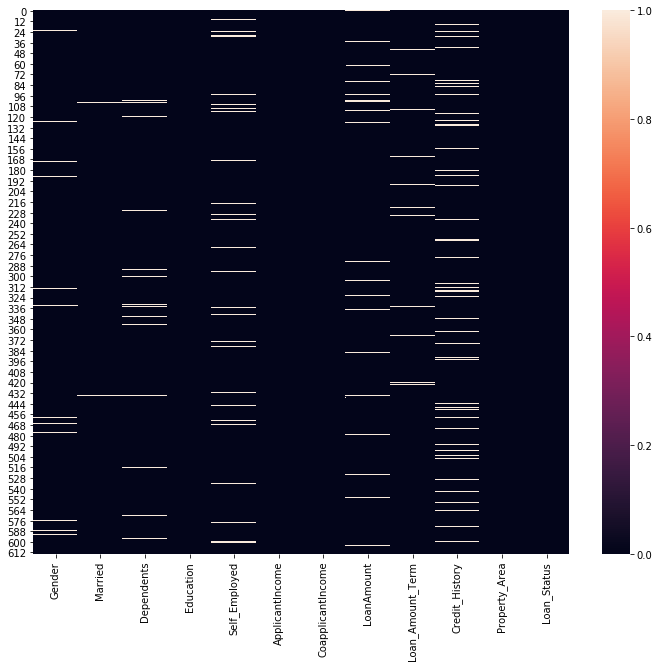

In [9]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(data.isna())
plt.show()

In [10]:
data['Loan_Status']=data['Loan_Status'].replace({'Y':1,'N':0})

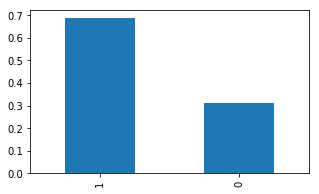

In [11]:
# CHECKING THE VALUE_COUNTS OF TARGET VARIABLE 
data['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(5,3))

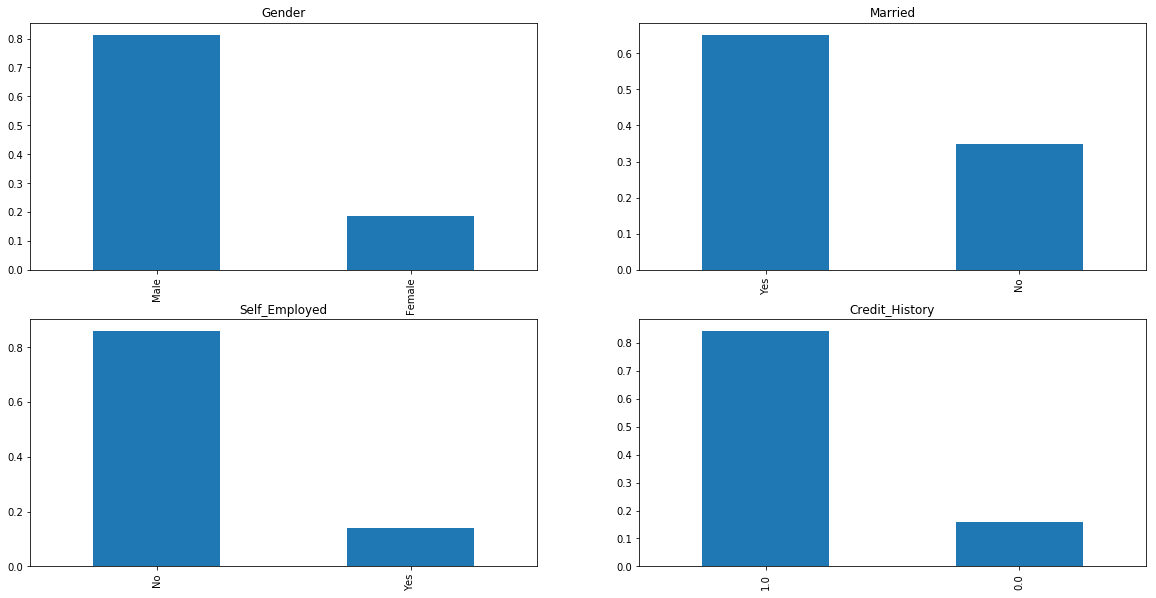

In [12]:
# VISUALIZING THE VALUE_COUNTS OF THE CATEGORICAL FEATURES OF THE DATASET
plt.figure(1)
plt.subplot(221)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')


In [13]:
# REPLACING THE 3+ DATA IN Dependents FEATURE
data['Dependents'].replace('3+', 3,inplace=True)

In [14]:
# FILLING THE MISSING VALUES OF THE CATEGORICAL DATA
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [15]:
# FILLING THE MISSING VALUES OF THE CONTINOUS VARIABLES OF THE DATA
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [16]:
# NOW CHCEKING THE NULL VALUES IN THE DATASET
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
# NO NULL VALUES ARE LEFT IN THE DATASET 

In [18]:
# CHECKING THE INFO OF THE DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(6)
memory usage: 57.6+ KB


In [19]:
# CHANGING THE DATA TYPE OF Credit_History FEATURE 
data['Credit_History']=data['Credit_History'].astype('O')

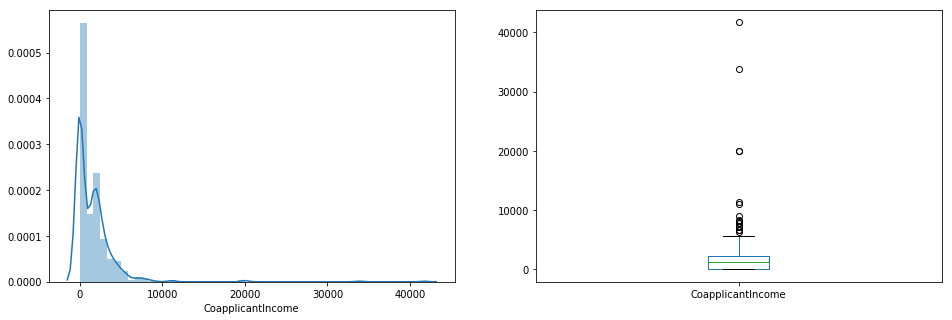

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['CoapplicantIncome']);

plt.subplot(122)
data['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()


In [21]:
# NAMES OF ALL THE CATEGORICAL FEATURES NAME 
cat_names = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
# CONVERTING THE CATEGORICAL DATA INTO NUMERICAL THROUGH GET DUMMIES

In [22]:
for i in data[cat_names]:
    data[i]=pd.get_dummies(data[i],drop_first=True,prefix=cat_names)

In [23]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,0,5849,0.0,128.0,360.0,1,0,1
1,1,1,0,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,1,0,1,3000,0.0,66.0,360.0,1,0,1
3,1,1,1,1,0,2583,2358.0,120.0,360.0,1,0,1
4,1,0,1,0,0,6000,0.0,141.0,360.0,1,0,1


In [24]:
data.dtypes

Gender                 uint8
Married                uint8
Dependents             uint8
Education              uint8
Self_Employed          uint8
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          uint8
Loan_Status            int64
dtype: object

In [25]:
# CONTINOUS DATASET
cname = ['CoapplicantIncome','LoanAmount','Loan_Amount_Term','ApplicantIncome']

In [26]:
# CHECKING THE HEAD OF THE HEAD 
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,0,5849,0.0,128.0,360.0,1,0,1
1,1,1,0,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,1,0,1,3000,0.0,66.0,360.0,1,0,1
3,1,1,1,1,0,2583,2358.0,120.0,360.0,1,0,1
4,1,0,1,0,0,6000,0.0,141.0,360.0,1,0,1


In [27]:
data['ApplicantIncome']=(data['ApplicantIncome'].astype(np.float32))
data['CoapplicantIncome']=(data['CoapplicantIncome'].astype(np.float32))
data['LoanAmount']=(data['LoanAmount'].astype(np.float32))
data['Loan_Amount_Term']=(data['Loan_Amount_Term'].astype(np.float32))
data['Property_Area']=data['Property_Area'].astype('O')
data['Gender']=data['Gender'].astype('O')
data['Married']=data['Married'].astype('O')
data['Dependents']=data['Dependents'].astype('O')
data['Education']=data['Education'].astype('O')
data['Self_Employed']=data['Self_Employed'].astype('O')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null float32
CoapplicantIncome    614 non-null float32
LoanAmount           614 non-null float32
Loan_Amount_Term     614 non-null float32
Credit_History       614 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float32(4), int64(1), object(7)
memory usage: 48.0+ KB


In [29]:
# DIVIDING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES
# X = INDEPENDENT VARIABLES 
# Y = DEPENDENT VARIABLES
x = data.drop(['Loan_Status'],axis=1)
y = data['Loan_Status']

In [30]:
# SPLITTING THE DATASET THROUGH TRAIN TEST SPLIT
# IMPORTING THE LIBRARY
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=47)

In [32]:
# LOGISTIC CLASSIFICATION MODEL
# IMPORTING THE LIBRARY
from sklearn.linear_model import LogisticRegression

In [33]:
log_reg = LogisticRegression(random_state=47)

In [34]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=47, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
pred = log_reg.predict(x_test)

In [36]:
# CHECKING THE ACCURACY OF THE MODEL
# IMPORTING THE LIBRARIES
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [37]:
score = accuracy_score(pred,y_test)*100
score

77.92207792207793

In [38]:
# LOGISTIC MODEL IS PREDICTING ACCURACY SCORE OF 78%

In [39]:
f1 = f1_score(pred,y_test)*100
f1

85.08771929824562

In [40]:
# BUT AS OUR DATA IS NOT PROPERLY DISTRIBUTED SO WE CANNOT TOTALLY RELY ON ACCURACY SCORE
# HAS F1_SCORE IS CONSIDERED AS CORRECT AND F1 SCORE IS SHOWING THAT OUR LOGISTIC MODEL IS PREDICTING 85 % CORRECT VALUES

In [41]:
matrix = confusion_matrix(pred,y_test)
matrix

array([[23,  3],
       [31, 97]], dtype=int64)

In [42]:
#build confusion matrix
CM = pd.crosstab(pred,y_test)
#let us save TP,TN,FP,FN
TP=CM.iloc[1,1]
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]

In [43]:
#false negative rate
((FN*100)/(FN+TP))

24.21875

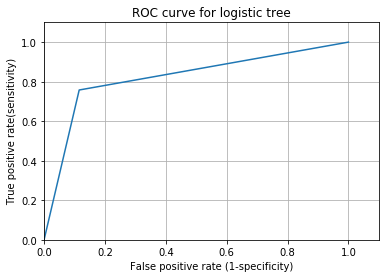

In [44]:
#ROC CURVE
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr,tpr,threshold = metrics.roc_curve(pred,y_test)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.title("ROC curve for logistic tree")
plt.xlabel("False positive rate (1-specificity)")
plt.ylabel("True positive rate(sensitivity)")
plt.grid(True)

In [45]:
# FROM THE CONFUSION MATRIX IT IS CLEAR THAT OUR MODEL HAS PREDICTED VERY LESS FALSE NEGATIVE RATE WHICH IS VERY GOOD FOR A MODEL

In [46]:
# DECISION TREE ALGORITHM
# IMPORTING THE DATASET
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=47)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=47,
            splitter='best')

In [48]:
y_pred = dtc.predict(x_test)
dtc.score(x_train,y_train)*100

82.82608695652173

In [49]:
# MODEL HAS BEEN TRAINED WITH 83% 

In [50]:
score = accuracy_score(y_pred,y_test)*100
score

75.97402597402598

In [51]:
f1 = f1_score(y_pred,y_test)*100
f1

83.55555555555554

In [52]:
#build confusion matrix
CM = pd.crosstab(y_pred,y_test)
#let us save TP,TN,FP,FN
TP=CM.iloc[1,1]
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]

In [53]:
#false negative rate
((FN*100)/(FN+TP))

24.8

In [54]:
matrix = confusion_matrix(y_pred,y_test)
matrix

array([[23,  6],
       [31, 94]], dtype=int64)

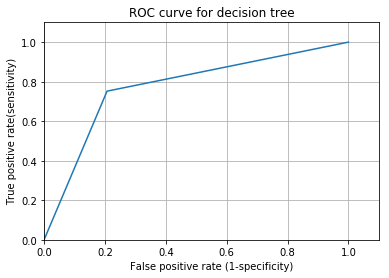

In [55]:
#ROC CURVE
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr,tpr,threshold = metrics.roc_curve(y_pred,y_test)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.title("ROC curve for decision tree")
plt.xlabel("False positive rate (1-specificity)")
plt.ylabel("True positive rate(sensitivity)")
plt.grid(True)

In [56]:
# RANDOM FOREST ALGORITHM
# IMPORTING THE LIBRARY
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=47)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=47, verbose=0, warm_start=False)

In [58]:
pred_y=rfc.predict(x_test)
rfc.score(x_train,y_train)

0.8173913043478261

In [59]:
score = accuracy_score(pred_y,y_test)*100
score

79.22077922077922

In [60]:
# RANDOM FOREST ALGORITHM MODEL HAS PREDICTED 80% CORRECT WHICH IS BETTER 

In [61]:
f1 = f1_score(pred_y,y_test)*100
f1

86.08695652173914

In [62]:
#build confusion matrix
CM = pd.crosstab(pred_y,y_test)
#let us save TP,TN,FP,FN
TP=CM.iloc[1,1]
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]

In [63]:
#false negative rate
((FN*100)/(FN+TP))

23.846153846153847

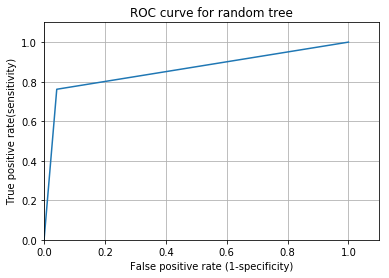

In [64]:
#ROC CURVE
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr,tpr,threshold = metrics.roc_curve(pred_y,y_test)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.title("ROC curve for random tree")
plt.xlabel("False positive rate (1-specificity)")
plt.ylabel("True positive rate(sensitivity)")
plt.grid(True)

In [65]:
# ON THE BASIS OF F1_SCORE,FALSE NEGATIVE RATE RANDOM FOREST ALGORTIHM IS BETTER MODEL